In [23]:
import numpy as np

In [24]:
x = np.array([[0,0], [0,1],[1,0],[1,1]])

#targets

t_and = np.array([0,0,0,1])
t_or= np.array([0,1,1,1])
t_nand= np.array([1,1,1,0])
t_nor= np.array([1,0,0,0])
t_xor= np.array([0,1,1,0])

In [25]:
#creating a class

class Perceptron:
    """Insert documentation"""
    def __init__(self, input_units):
        self.input_units = input_units
        #learning rate
        self.alpha = 0.01
        self.weights = np.random.randn(self.input_units) 
        self.bias = np.random.randn(1)
        
    def forward_step(self, data):
        #calculating the drive as sum of weights*inputs + bias 
        drive = np.dot(self.weights, data) + self.bias
        #drive = self.weights @ input + self.bias 
        return int(drive >=0)
        
    def training_step(self, input, label):
        #1 forward_step
        output = self.forward_step(input)
        #2 calculate weight updates 
        updates_w = self.alpha * (label-output) * input
        #3 bias update
        updates_b = self.alpha * (label-output) * 1
        #updates
        self.weights += updates_w
        self.bias += updates_b
        

In [21]:
#training

#target that we are training on 
t = t_and

#new perceptron instance 
perceptron = Perceptron(2)

#training loop
steps = []
accuracies = []

for i in range(500):
    #take a random sample from data, get the corresponding t
    
    index= np.random.randint(4)
    input = x[index]
    target = t[index]
    
    #perform a training step
    perceptron.training_step(input, target)
    
    #how does our perceptron perform?
    #performance over all possible inputs
    accuracy_sum = 0
    for k in range(4):
        output = perceptron.forward_step(x[k])
        accuracy_sum += int(output == t[k])
    
    accuracy = accuracy_sum/4
    accuracies.append(accuracy)
    
    
    

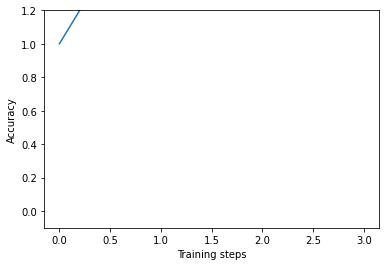

In [26]:
#visualize the training 
import matplotlib.pyplot as plt

plt.figure()
plt.plot(steps,accuracies)
plt.xlabel("Training steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1,1.2])
plt.show()
